# Prepare input data and filter to open access lines.

In [1]:
import os
import sys
import pickle

sys.path.append('..')
import utils.settings as settings

import pandas as pd
import numpy as np

from pandas_plink import read_plink1_bin, write_plink1_bin

from anndata import AnnData
import scanpy as sc

## Load data

MOFA factors

In [2]:
mofa_factors = pd.read_csv(settings.DATA_DIR + '/mofa_logcounts_model_factors.csv', index_col=0)
mofa_factors.head()

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,MOFA11,MOFA12,MOFA13,MOFA14,MOFA15,MOFA16,MOFA17,MOFA18,MOFA19,MOFA20
21843_1#10,-0.597704,1.067436,0.056496,1.347661,0.640743,0.337826,-0.466419,0.015208,0.292243,-0.632737,-0.583318,0.473121,0.454845,-0.991047,0.906530,-0.786617,0.445996,-1.810175,-1.039795,0.268045
21843_1#100,0.233285,2.137884,0.646811,1.129460,-0.352773,-0.091806,0.924137,-0.373492,1.789593,-0.659233,0.462286,-0.138813,-2.220937,1.554073,-1.517363,-0.350251,-0.165591,1.199816,0.729859,0.048444
21843_1#101,-0.054712,1.786031,-0.099625,0.364118,0.057125,0.215032,0.242728,0.075943,0.879961,0.680635,0.372930,0.268620,-2.024130,1.150452,-0.054901,-0.459422,0.421497,1.172856,0.729108,-0.124239
21843_1#102,-0.730924,1.132253,0.195645,0.588264,1.548193,0.251288,-0.399754,-0.210800,0.115147,0.060057,-0.584682,-0.421879,-0.127777,0.157820,0.735246,-1.818381,-0.148435,-0.168095,-0.770380,1.124324
21843_1#103,-0.257399,1.515610,-0.154816,0.199532,0.719182,-0.296087,-0.426952,-0.229939,0.091292,-0.430566,-0.473848,-1.243472,-0.852861,-0.064272,0.321025,-0.666393,0.455624,-0.410516,-0.600952,0.304595


In [3]:
mofa_factors.shape

(34256, 20)

Expression data

In [4]:
exprs = pd.read_pickle(settings.DATA_DIR + '/phenotype.csv.pkl')
exprs.head()

,21843_1#10,21843_1#100,21843_1#101,21843_1#102,21843_1#103,21843_1#105,21843_1#106,21843_1#107,21843_1#108,21843_1#109,...,24539_8#88,24539_8#89,24539_8#90,24539_8#91,24539_8#92,24539_8#93,24539_8#94,24539_8#95,24539_8#97,24539_8#98
ENSG00000000003_TSPAN6,5.520777,6.456208,5.878671,4.860824,5.903640,4.513537,6.401983,5.909216,5.366645,3.228852,...,5.841814,6.104105,6.275649,7.029407,5.806978,6.199875,7.014180,6.228476,6.217161,6.034232
ENSG00000000419_DPM1,5.392461,6.065923,6.838769,6.614268,6.512403,5.527439,6.525591,6.381135,6.157296,6.248478,...,6.543807,6.369119,7.185421,6.337047,6.162437,5.885993,7.431358,7.013124,4.851771,4.937248
ENSG00000000457_SCYL3,0.000174,0.352597,0.000000,0.825955,2.201697,0.262446,0.000000,1.506837,0.283516,3.241977,...,0.017386,0.949668,0.035526,0.032044,1.773369,0.000000,0.108025,1.756339,2.492943,1.363441
ENSG00000000460_C1orf112,1.471928,4.536968,4.318528,5.373009,4.636175,4.225468,0.409785,3.668277,3.057933,3.154891,...,4.720967,3.791536,2.696476,4.227515,4.243689,3.227508,2.621121,3.950978,3.926914,4.211904
ENSG00000001036_FUCA2,2.908802,3.867327,3.321747,3.736476,4.917576,2.456866,0.577839,4.777404,2.873857,2.536708,...,3.070608,4.491643,4.206249,3.695005,2.652845,4.221847,3.188030,4.741496,3.872743,4.374577


In [5]:
exprs.shape

(11231, 34256)

Cell meta data

In [6]:
cell_meta = pd.read_csv(settings.DATA_DIR + '/cell_metadata_cols.tsv', sep='\t').loc[exprs.columns]
cell_meta.head()

,assigned,auxDir,cell_filter,cell_name,compatible_fragment_ratio,day,donor,expected_format,experiment,frag_dist_length,...,donor_short_id,donor_long_id,pseudo,PC1_top100hvgs,PC1_top200hvgs,PC1_top500hvgs,PC1_top1000hvgs,PC1_top2000hvgs,princ_curve,princ_curve_scaled01
21843_1#10,1,aux_info,True,21843_1#10,0.999497,day1,joxm,IU,expt_09,1001,...,joxm_1,HPSI0114i-joxm_1,0.292682,-13.353833,-12.969161,-11.769526,-12.153335,-12.871002,39.972588,0.352570
21843_1#100,1,aux_info,True,21843_1#100,0.999456,day1,fafq,IU,expt_09,1001,...,fafq_1,HPSI0314i-fafq_1,0.484716,2.399795,4.633188,5.131531,7.883242,9.916888,56.433387,0.497759
21843_1#101,1,aux_info,True,21843_1#101,0.999549,day1,fafq,IU,expt_09,1001,...,fafq_1,HPSI0314i-fafq_1,0.403809,-0.612621,0.006692,-0.643021,0.185298,-0.425978,52.966142,0.467177
21843_1#102,1,aux_info,True,21843_1#102,0.999422,day1,wuye,IU,expt_09,1001,...,wuye_2,HPSI1013i-wuye_2,0.260772,-11.946009,-12.691233,-14.508021,-15.328236,-18.071351,38.419984,0.338876
21843_1#103,1,aux_info,True,21843_1#103,0.999446,day1,joxm,IU,expt_09,1001,...,joxm_1,HPSI0114i-joxm_1,0.355366,-5.735735,-5.389405,-5.802985,-6.625860,-9.430127,48.488060,0.427679


In [7]:
cell_meta.shape

(34256, 93)

SNPs

In [8]:
snps = pd.read_csv(settings.DATA_DIR + '/Annas_results_all_common_eqtls.csv', index_col=0).reset_index(drop=True)
snps.head()

/omics/groups/OE0540/internal/users/heinent/miniconda3/envs/cellregmap/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,gene,n_snps,chrom,pv_raw,snpID,pv,eqtl
0,ENSG00000250462,909,17,0.301036,17_28859432_G_A,1.0,ENSG00000250462-17_28859432_G_A
1,ENSG00000250462,909,17,0.195837,17_28859670_C_A,1.0,ENSG00000250462-17_28859670_C_A
2,ENSG00000250462,909,17,0.301036,17_28859809_C_T,1.0,ENSG00000250462-17_28859809_C_T
3,ENSG00000250462,909,17,0.588771,17_28859954_C_T,1.0,ENSG00000250462-17_28859954_C_T
4,ENSG00000250462,909,17,0.974797,17_28860333_T_C,1.0,ENSG00000250462-17_28860333_T_C


In [9]:
snps.shape

(5238155, 7)

Genotypes

In [10]:
genotypes = read_plink1_bin(settings.HIPSCI_GENO_PATH)

Mapping files: 100%|██████████| 3/3 [00:42<00:00, 14.30s/it]


In [11]:
genotypes

<xarray.DataArray 'genotype' (sample: 319, variant: 9863049)>
dask.array<transpose, shape=(319, 9863049), dtype=float32, chunksize=(319, 1024), chunktype=numpy.ndarray>
Coordinates:
  * sample   (sample) object 'HPSI0514i-naah_4' ... 'HPSI0115i-vazt_1'
  * variant  (variant) <U14 'variant0' 'variant1' ... 'variant9863048'
    fid      (sample) object '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    iid      (sample) object 'HPSI0514i-naah_4' ... 'HPSI0115i-vazt_1'
    father   (sample) object '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    mother   (sample) object '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    gender   (sample) object '0' '0' '0' '0' '0' '0' ... '0' '0' '0' '0' '0' '0'
    trait    (sample) object '-9' '-9' '-9' '-9' '-9' ... '-9' '-9' '-9' '-9'
    chrom    (variant) object '1' '1' '1' '1' '1' ... '13' '13' '13' '13' '13'
    snp      (variant) object '1_662622_G_A' ... '13_115109852_C_T'
    cm       (variant) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    pos      (variant) int32 662622 693731 727841 ... 115108993 115109852
    a0       (variant) object 'G' 'A' 'G' 'C' 'T' 'T' ... 'C' 'T' 'C' 'G' 'C'
    a1       (variant) object 'A' 'G' 'A' 'G' 'C' 'C' ... 'A' 'A' 'G' 'A' 'T'

Kinship

In [12]:
kinship = pd.read_csv(settings.HIPSCI_KINSHIP_PATH, sep='\t', index_col=0)
kinship.head()

,HPSI0216i-tony_5,HPSI0316i-pecz_2,HPSI0216pf-tony,HPSI0316pf-zuik,HPSI0316i-xaqm_4,HPSI0316i-tezs_6,HPSI0316pf-tezs,HPSI0216pf-puxp,HPSI0316i-zuik_6,HPSI0316pf-pecz,...,HPSI0416i-eapo_2,HPSI0616i-duve_6,HPSI0616pf-bury,HPSI0516i-peoo_1,HPSI0416pf-eapo,HPSI0616i-mifg_5,HPSI0516pf-eosr,HPSI0616pf-xuvy,HPSI0416pf-cihd,HPSI0616i-mifg_2
HPSI0216i-tony_5,1.090410,0.051717,1.073300,0.059506,0.035299,0.073922,0.073852,-0.000251,0.059552,0.053030,...,-0.001229,-0.008106,0.135062,-0.013488,-0.001106,-0.013730,-0.011869,0.000705,-0.015742,-0.013401
HPSI0316i-pecz_2,0.051717,1.192020,0.052249,0.210874,0.074787,0.028702,0.028511,-0.005072,0.210959,1.157990,...,-0.008532,-0.014385,0.050355,-0.014401,-0.008551,-0.008111,-0.002670,-0.012330,-0.001960,-0.007847
HPSI0216pf-tony,1.073300,0.052249,1.090400,0.059812,0.035236,0.074166,0.074083,-0.000471,0.059828,0.053502,...,-0.000968,-0.008188,0.135236,-0.013054,-0.000894,-0.013674,-0.012524,0.000525,-0.015914,-0.013408
HPSI0316pf-zuik,0.059506,0.210874,0.059812,1.223510,0.069441,0.044083,0.044181,-0.009814,1.196800,0.210985,...,0.001352,-0.010644,0.057179,-0.003665,0.001318,-0.008868,-0.007873,-0.009803,-0.002973,-0.009225
HPSI0316i-xaqm_4,0.035299,0.074787,0.035236,0.069441,1.069220,0.026322,0.026003,-0.013545,0.069168,0.074645,...,-0.007656,-0.000284,0.029205,-0.001277,-0.007826,-0.011515,-0.004779,-0.003508,-0.020314,-0.011321


In [13]:
kinship.shape

(1953, 1953)

## Discretize MOFA factors

In [14]:
adata = AnnData(exprs.T, obs=cell_meta)
adata.obsm['X_mofa'] = mofa_factors
adata

/tmp/ipykernel_44974/3822977041.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(exprs.T, obs=cell_meta)


AnnData object with n_obs × n_vars = 34256 × 11231
    obs: 'assigned', 'auxDir', 'cell_filter', 'cell_name', 'compatible_fragment_ratio', 'day', 'donor', 'expected_format', 'experiment', 'frag_dist_length', 'gc_bias_correct', 'is_cell_control', 'is_cell_control_bulk', 'is_cell_control_control', 'library_types', 'libType', 'log10_total_counts', 'log10_total_counts_endogenous', 'log10_total_counts_ERCC', 'log10_total_counts_feature_control', 'log10_total_counts_MT', 'log10_total_features', 'log10_total_features_endogenous', 'log10_total_features_ERCC', 'log10_total_features_feature_control', 'log10_total_features_MT', 'mapping_type', 'mates1', 'mates2', 'n_alt_reads', 'n_total_reads', 'num_assigned_fragments', 'num_bias_bins', 'num_bootstraps', 'num_compatible_fragments', 'num_consistent_mappings', 'num_inconsistent_mappings', 'num_libraries', 'num_mapped', 'num_processed', 'num_targets', 'nvars_used', 'pct_counts_endogenous', 'pct_counts_ERCC', 'pct_counts_feature_control', 'pct_counts

In [15]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20, use_rep='X_mofa')

In [16]:
sc.tl.umap(adata)

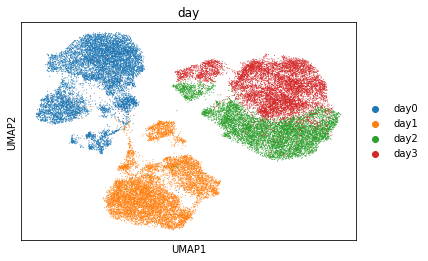

In [17]:
sc.pl.umap(adata, color=['day'])

In [18]:
sc.tl.leiden(adata, resolution=0.5)

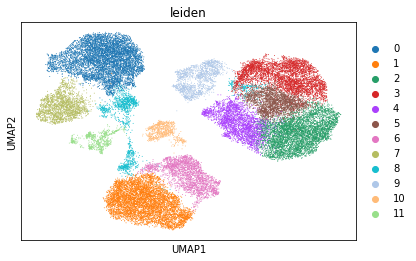

In [19]:
sc.pl.umap(adata, color=['leiden'])

In [20]:
adata.obsm['X_leiden'] = pd.get_dummies(adata.obs['leiden'])

## Filter to open access

In [21]:
open_access_donors = pd.Index(genotypes.sample.values).intersection(adata.obs['donor_long_id']).tolist()
len(open_access_donors)

100

In [22]:
adata = adata[adata.obs['donor_long_id'].isin(open_access_donors)]
adata

View of AnnData object with n_obs × n_vars = 27598 × 11231
    obs: 'assigned', 'auxDir', 'cell_filter', 'cell_name', 'compatible_fragment_ratio', 'day', 'donor', 'expected_format', 'experiment', 'frag_dist_length', 'gc_bias_correct', 'is_cell_control', 'is_cell_control_bulk', 'is_cell_control_control', 'library_types', 'libType', 'log10_total_counts', 'log10_total_counts_endogenous', 'log10_total_counts_ERCC', 'log10_total_counts_feature_control', 'log10_total_counts_MT', 'log10_total_features', 'log10_total_features_endogenous', 'log10_total_features_ERCC', 'log10_total_features_feature_control', 'log10_total_features_MT', 'mapping_type', 'mates1', 'mates2', 'n_alt_reads', 'n_total_reads', 'num_assigned_fragments', 'num_bias_bins', 'num_bootstraps', 'num_compatible_fragments', 'num_consistent_mappings', 'num_inconsistent_mappings', 'num_libraries', 'num_mapped', 'num_processed', 'num_targets', 'nvars_used', 'pct_counts_endogenous', 'pct_counts_ERCC', 'pct_counts_feature_control', 'pc

In [23]:
genotypes = genotypes[:, pd.Series(genotypes.snp.values).isin(snps['snpID'])] # restrict to SNPs tested in analysis
genotypes = genotypes[pd.Series(genotypes.sample.values).isin(open_access_donors), :] # restrict to top donors
genotypes.shape

/omics/groups/OE0540/internal/users/heinent/miniconda3/envs/cellregmap/lib/python3.8/site-packages/xarray/core/indexing.py:1227: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


(100, 2710577)

In [24]:
kinship = kinship.loc[open_access_donors, open_access_donors]
kinship.shape

(100, 100)

## Save

In [25]:
path = settings.DATA_DIR + '/filtered'
if not os.path.exists(path):
    os.mkdir(path)

In [26]:
sc.write(settings.DATA_DIR + '/filtered/adata.h5ad', adata)
write_plink1_bin(genotypes, settings.DATA_DIR + '/filtered/genotypes.bed')
kinship.to_csv(settings.DATA_DIR + '/filtered/kinship.csv')

Writing BED: 100%|██████████| 2/2 [00:32<00:00, 16.12s/it]

Writing FAM... done.
Writing BIM... 

done.
